In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "..\\data\\raw\\smedebtsu.xlsx"

In [3]:
data = pd.read_excel(data_path)
data

,Date,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
0,2013-10-13 00:00:00,13,10,2013,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.00,0.00,2442.00,0.0,2981.00
1,2013-11-13 00:00:00,13,11,2013,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.00,0.00,2422.09,0.0,6844.09
2,2013-12-10 00:00:00,10,12,2013,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.00,0.00,2640.00,0.0,7150.00
3,2014-01-23 00:00:00,23,1,2014,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.00,0.00,0.00,0.0,0.00
4,2014-03-05 00:00:00,5,3,2014,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-11-28 00:00:00,28,11,2022,28369.0,115775.00,0.00,0,245740.0,22638.00,62084.00,104335.00,14025.00,19800.0,0.00
110,2023-02-05 00:00:00,5,2,2023,26774.0,108064.00,0.00,0,234740.0,15125.00,57772.00,98703.00,8800.00,15400.0,0.00
111,2023-03-05 00:00:00,5,3,2023,26202.0,104225.00,0.00,0,231077.0,11352.00,56826.00,95810.00,5500.00,13200.0,0.00
112,2023-04-05 00:00:00,5,4,2023,25432.0,100375.00,0.00,0,227403.0,7579.00,54618.08,92689.96,0.00,11000.0,0.00


In [4]:
# Descriptive statistics
data.describe()

,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,13.614035,7.096491,2017.605263,38755.816579,66840.291930,1406.541053,971.956140,185799.648158,40254.729649,21544.682018,42589.622456,8460.370175,40982.072807,18831.246404
std,8.636728,3.672354,3.012124,41698.925450,46056.428855,3637.700561,1896.312866,93078.720974,56996.382488,22273.512355,39507.882437,8369.124958,52769.068725,17520.902350
min,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,4.000000,2015.000000,0.000000,22000.000000,0.000000,0.000000,108655.250000,0.000000,2455.750000,0.000000,104.500000,0.000000,0.000000
50%,12.500000,8.000000,2017.000000,31707.500000,76131.000000,0.000000,0.000000,210353.000000,0.000000,10450.000000,46695.000000,6176.500000,0.000000,15400.000000
75%,20.750000,10.000000,2020.000000,60709.000000,106909.000000,0.000000,783.750000,252254.750000,76238.250000,45911.250000,79585.000000,14542.000000,104115.000000,33041.250000
max,31.000000,12.000000,2023.000000,138754.000000,146476.000000,14300.000000,7986.000000,352099.000000,176000.000000,70059.000000,121033.000000,29700.000000,143000.000000,53350.000000


   # Exploratory Data Analysis
   Overall goal:
   - Get an understanding for which variables are important 
   - Check any duplicates, missing values, or incorrect data

## Data Preprocessing
- Check missing values/ duplicates/ outlier points

In [5]:
# the length of data
print(f"The Length of the data: {data.shape}")

The Length of the data: (114, 15)


### Check missing values

In [6]:
# Missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     114 non-null    object 
 1   Day      114 non-null    int64  
 2   Month    114 non-null    int64  
 3   Year     114 non-null    int64  
 4   LenderA  114 non-null    float64
 5   LenderB  114 non-null    float64
 6   LenderC  114 non-null    float64
 7   LenderD  114 non-null    int64  
 8   LenderE  114 non-null    float64
 9   LenderF  114 non-null    float64
 10  LenderG  114 non-null    float64
 11  LenderH  114 non-null    float64
 12  LenderI  114 non-null    float64
 13  LenderJ  114 non-null    float64
 14  LenderK  114 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 13.5+ KB


[Comment] We don't see any missing values

### Check duplicates

In [7]:
# Convert objects to datetime
# In the Date column, there are the following cases: 04/042022 -- 02/052022 -- 02/052022, 
# so I use 3 other columns to create the "Date_time" column
data['Date_time'] = pd.to_datetime(data[['Day', 'Month', 'Year']])
data = data.drop(columns=['Date', 'Day', 'Month', 'Year'])
data.head()

,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,Date_time
0,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00,2013-10-13
1,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09,2013-11-13
2,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00,2013-12-10
3,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00,2014-01-23
4,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00,2014-03-05


In [8]:
# Move the 'Date_time' column from last to first position
cols = ['Date_time'] + [col for col in data.columns if col != 'Date_time']
data = data.reindex(columns=cols)
data.head()

,Date_time,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
0,2013-10-13,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00
1,2013-11-13,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09
2,2013-12-10,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00
3,2014-01-23,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00
4,2014-03-05,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00


In [9]:
# Show the number of duplicated observations
print(f"The number of duplicated values in the dataset: {data.duplicated().sum()}")

The number of duplicated values in the dataset: 30


In [10]:
# Remove duplicate rows
data = data.drop_duplicates(ignore_index=True)
data

,Date_time,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
0,2013-10-13,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.00,0.00,2442.00,0.0,2981.00
1,2013-11-13,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.00,0.00,2422.09,0.0,6844.09
2,2013-12-10,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.00,0.00,2640.00,0.0,7150.00
3,2014-01-23,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.00,0.00,0.00,0.0,0.00
4,2014-03-05,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2022-11-28,28369.0,115775.00,0.00,0,245740.0,22638.00,62084.00,104335.00,14025.00,19800.0,0.00
80,2023-02-05,26774.0,108064.00,0.00,0,234740.0,15125.00,57772.00,98703.00,8800.00,15400.0,0.00
81,2023-03-05,26202.0,104225.00,0.00,0,231077.0,11352.00,56826.00,95810.00,5500.00,13200.0,0.00
82,2023-04-05,25432.0,100375.00,0.00,0,227403.0,7579.00,54618.08,92689.96,0.00,11000.0,0.00


In [11]:
# Sort Datet time
data = data.sort_values(by='Date_time')

## Data Visualization

- Figure 1: Show the development of average debts over the years
- Figure 2: Show the actual total debts (from all lenders) on every month of the year over the past 10 years

### Visualize the average debts

In [12]:
df_average_debts = data.copy()
df_average_debts.head()

,Date_time,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
0,2013-10-13,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00
1,2013-11-13,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09
2,2013-12-10,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00
3,2014-01-23,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00
4,2014-03-05,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00


In [13]:
# Calculate the average debts of every month over 10 years
df_average_debts['Total_debts'] = df_average_debts.sum(axis=1)
df_average_debts.head()

,Date_time,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,Total_debts
0,2013-10-13,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00,228007.01
1,2013-11-13,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09,227988.31
2,2013-12-10,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00,265199.00
3,2014-01-23,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00,299453.00
4,2014-03-05,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00,290103.00


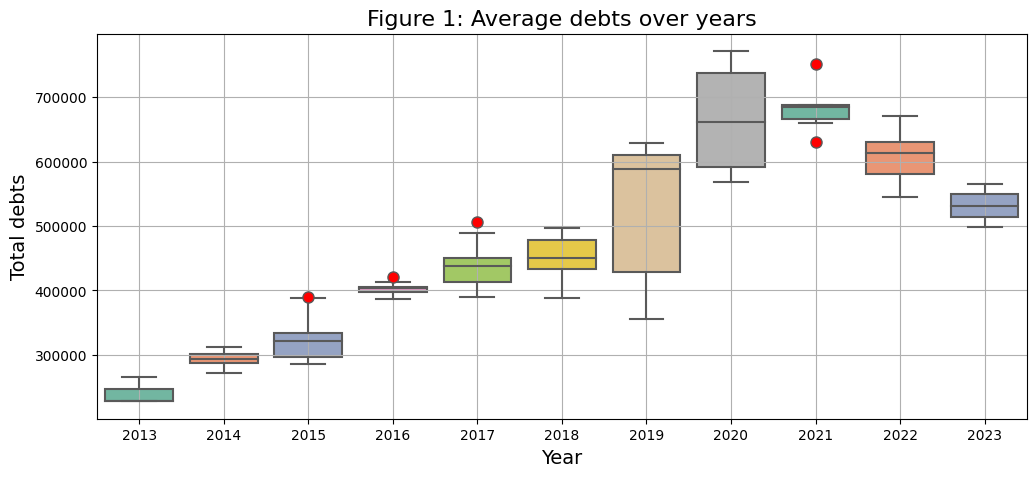

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(
    x=df_average_debts['Date_time'].dt.year, 
    y=df_average_debts['Total_debts'],
    palette='Set2',
    flierprops=dict(marker='o', markerfacecolor='red', markersize=8)
)

plt.title('Figure 1: Average debts over years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total debts', fontsize=14)
plt.grid(True)
plt.show()

### Visualize the total debts

In [15]:
# # Convert an the object/int64 to a datetime timestamp
# df_total_debts['Month_year'] = pd.to_datetime(df_total_debts['Month'] + '-' + df_total_debts['Year'].astype(str), format='%b-%Y')
# df_total_debts.head()

# Calculate the average debts of every month over 10 years
df_total_debts = data.copy()
df_total_debts['Total_debts'] = df_total_debts.sum(axis=1)
df_total_debts.head()

,Date_time,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,Total_debts
0,2013-10-13,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00,228007.01
1,2013-11-13,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09,227988.31
2,2013-12-10,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00,265199.00
3,2014-01-23,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00,299453.00
4,2014-03-05,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00,290103.00


In [16]:
df1 = df_total_debts[['Date_time', 'Total_debts']]
df1.head()

,Date_time,Total_debts
0,2013-10-13,228007.01
1,2013-11-13,227988.31
2,2013-12-10,265199.00
3,2014-01-23,299453.00
4,2014-03-05,290103.00


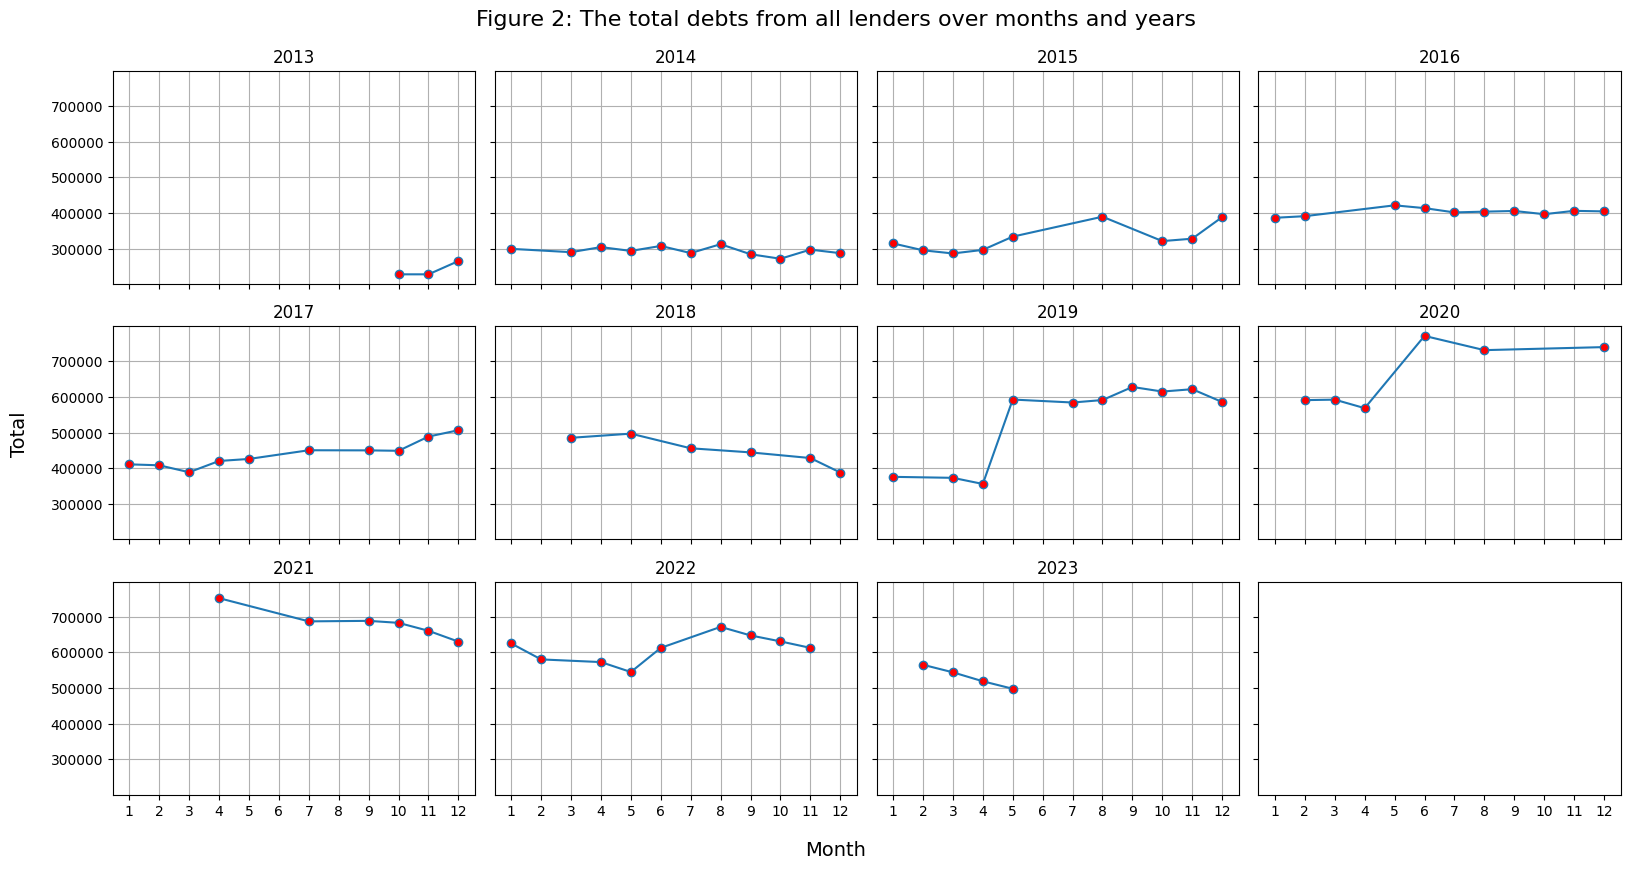

In [17]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(16, 8))
ax = ax.ravel()

for i, year in enumerate(range(2013, 2024)):
    year_data = df1[df1['Date_time'].dt.year == year]
    # Plot the data on the corresponding subplot
    ax[i].plot(year_data['Date_time'].dt.month, year_data['Total_debts'], marker='o', markerfacecolor='red')
    ax[i].grid(True)
    ax[i].set_title(year)
    ax[i].set_xticks(range(1, 13))
# Adjust the spacing between subplots
fig.tight_layout()

# Set labels
fig.text(0.5, -0.02, 'Month', ha='center', va='center', fontsize=14)
fig.text(-0.01, 0.5, 'Total', ha='center', va='center', rotation='vertical', fontsize=14)

fig.suptitle('Figure 2: The total debts from all lenders over months and years', fontsize=16, y=1.03)
plt.show()

In [18]:
# Checking folder exists
def check_dir_exists(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [19]:
# Save processed data file 
save_path = '../data/processed'
check_dir_exists(save_path)

data.to_csv(os.path.join(save_path, 'processed_smedebtsu.csv'), index=False)